In [1]:
#  import the necessary liabraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import preprocessing

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# reading the data
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.head()  #it show 5 dataset from starting

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()  #it describe all values which have integer value

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.nunique()  # unique value in every column

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
data.dtypes    #  it show what is the type of data

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data.dtypes.value_counts()   # it show how many int,float,and object is here.

int64      5
object     5
float64    2
dtype: int64

#  EDA(exploratory data analysis)

In [8]:
print("total no of passenger: ",len(data))
print("total no of passenger who Survived: ",len(data[data['Survived']== 1]))

total no of passenger:  891
total no of passenger who Survived:  342


In [9]:
print("% of passenger Survived: ",round(342/891*100,2),"%")

% of passenger Survived:  38.38 %


In [10]:
print("% of men who Survived : ", round((len(data[(data['Survived'] == 1) & (data['Sex'] =='male')]) / len(data)) * 100,2),"%") 
print("% of women who Survived : ", round((len(data[(data['Survived'] == 1) & (data['Sex'] =='female')]) / len(data)) * 100,2),"%") 


% of men who Survived :  12.23 %
% of women who Survived :  26.15 %


In [11]:
print("% of passenger who Survived in 1st class : ",round((len(data[(data['Survived'] == 1) & (data['Pclass'] ==1)]) / len(data)) * 100,2),"%") 
print("% of passenger who Survived in 2nd class : ",round((len(data[(data['Survived'] == 1) & (data['Pclass'] ==2)]) / len(data)) * 100,2),"%") 
print("% of passenger who Survived in 3rd class : ",round((len(data[(data['Survived'] == 1) & (data['Pclass'] ==3)]) / len(data)) * 100,2),"%") 


% of passenger who Survived in 1st class :  15.26 %
% of passenger who Survived in 2nd class :  9.76 %
% of passenger who Survived in 3rd class :  13.36 %


In [12]:
print("% of Children who Survived : ",round((len(data[(data['Survived'] == 1) & (data['Age'] < 18)]) / len(data)) * 100,2),"%") 
print("% of Adults who Survived : ",round((len(data[(data['Survived'] == 1) & (data['Age'] >18)]) / len(data)) * 100,2),"%") 


% of Children who Survived :  6.85 %
% of Adults who Survived :  24.69 %


In [13]:
data.isnull().sum() # presenting the null values in every column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

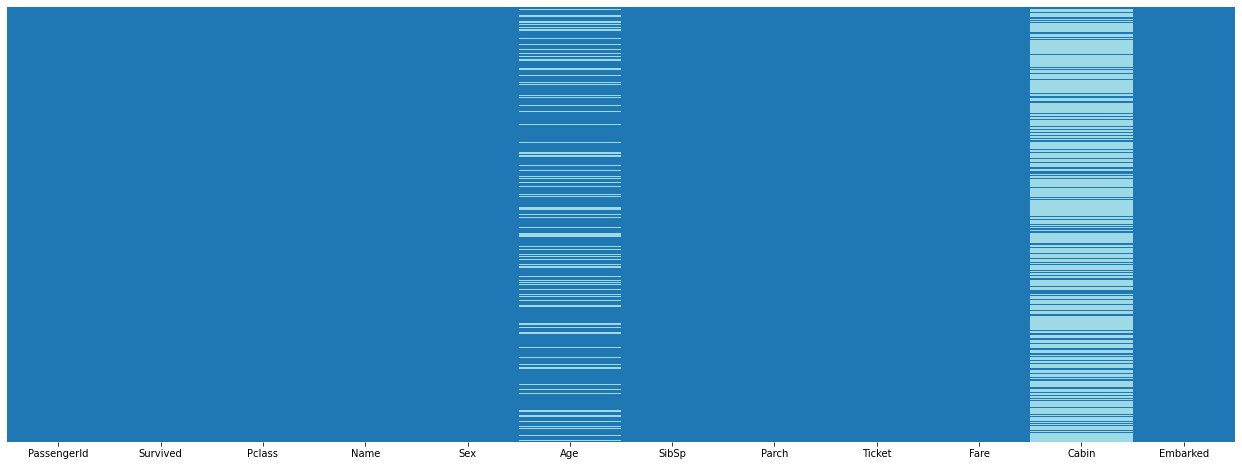

In [15]:
plt.figure(figsize = (22,8))
sns.heatmap(data.isnull(),yticklabels = False,cbar=False,cmap='tab20',linecolor ='yellow');

In [16]:
Percentage_value= data.isnull().sum() * 100 / len(data)

In [17]:
Percentage_value

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [18]:
#  the value of the cabin is greater than 30% ,so it should be drop,and all not nesseceary data should be drop...

df = data.drop(['PassengerId','Ticket','Name'], axis= 1 )
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [19]:
# droping the column having max. null value
df.drop('Cabin', axis = 1, inplace = True)

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0]) # because "embarked" have catageorgical data
df['Age'] = df['Age'].fillna(df['Age'].mean())  # "Age "  have conteneous data

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [23]:
df.isnull().sum()  #  now again showing the null values,see there is no null value

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

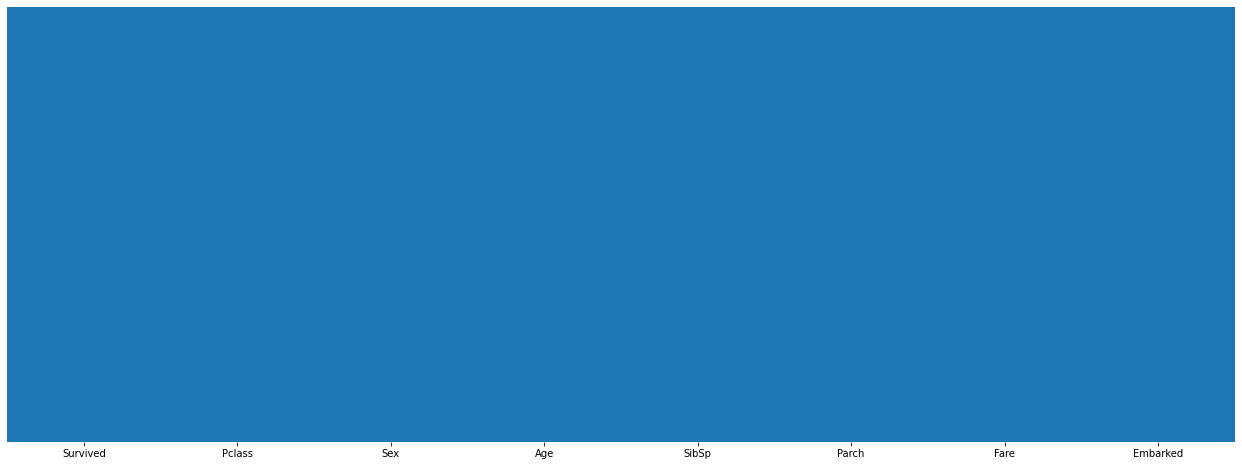

In [24]:
plt.figure(figsize = (22,8))
sns.heatmap(df.isnull(),yticklabels = False,cbar=False,cmap='tab20',linecolor ='yellow');

In [25]:
#   no null values are  present in heat map..
target = df['Survived']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

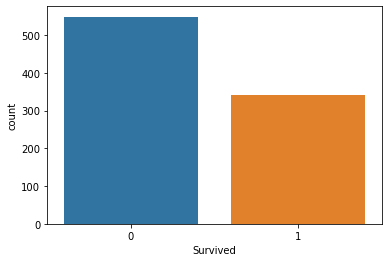

In [26]:
sns.countplot(x='Survived',data=df)

In [27]:
x = df.drop('Survived',axis = 1)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [28]:
#  spliting the data set into categorical column and numerical column..
x_cat = x.select_dtypes(include = 'object')
x_cat.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [29]:
x_num = x.select_dtypes(exclude = 'object')
x_num.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [48]:
x_cat_dummy = pd.get_dummies(x_cat,drop_first = True)
x_cat_dummy.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [49]:
df_data = pd.concat([x_num,x_cat_dummy],axis=1)
df_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [52]:
x_train,x_test,y_train,y_test = train_test_split(df_data,target,test_size = .20, random_state = 42)
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(712, 8)

(179, 8)

(712,)

(179,)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree

model1 = LogisticRegression(random_state = 42)
model2 = tree.DecisionTreeClassifier(criterion ='entropy',random_state = 42)

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

LogisticRegression(random_state=42)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [57]:
y_predicted1 = model1.predict(x_test)
y_predicted1
y_predicted2 = model2.predict(x_test)
y_predicted2

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score

print("model1 Accuracy : ", accuracy_score(y_test, y_predicted1))
print("model2 Accuracy : ", accuracy_score(y_test, y_predicted2))

model1 Accuracy :  0.8044692737430168
model2 Accuracy :  0.7877094972067039


In [62]:
from sklearn.metrics import confusion_matrix

print("model1 confusion matrix : ")
cm1 = confusion_matrix(y_test, y_predicted1)
cm1
print("model2 confusion matrix : ")
cm2 = confusion_matrix(y_test, y_predicted2)
cm2

model1 confusion matrix : 


array([[89, 16],
       [19, 55]], dtype=int64)

model2 confusion matrix : 


array([[86, 19],
       [19, 55]], dtype=int64)

# lets check accuracy manually

accuracy = (TP+TN)/(TP+TN+FP+FN)


In [63]:
(89+55)/(89+19+16+55)  # model1

0.8044692737430168

In [64]:
#  for model2 accuracy
(86+55)/(86+19+19+55)

0.7877094972067039

#   similiarly i can manually calculate recall/precison/F1 score¶

In [65]:
from sklearn.metrics import classification_report

In [66]:
print("model1 classification Report : ")
print(classification_report(y_test,y_predicted1))
print("model2 classification Report :" )
print(classification_report(y_test,y_predicted2))

model1 classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

model2 classification Report :
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [72]:
# ROC curve
fpr,tpr,thresholds = roc_curve(y_test,y_predicted1)

In [73]:
# threshold[0] means no instances predicted(it should beread from 0-max)
print('threshold=',thresholds)
print('True positive rate= ',tpr)
print('False positive rate= ',fpr)

threshold= [2 1 0]
True positive rate=  [0.         0.74324324 1.        ]
False positive rate=  [0.         0.15238095 1.        ]


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

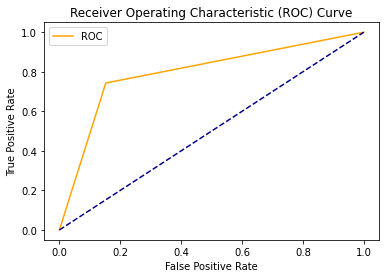

In [74]:
# or model1

plt.plot(fpr, tpr, color = 'orange',label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [75]:
# ROC curve model2
fpr,tpr,thresholds = roc_curve(y_test,y_predicted2)

In [76]:
# threshold[0] means no instances predicted(it should beread from 0-max)
print('threshold=',thresholds)
print('True positive rate= ',tpr)
print('False positive rate= ',fpr)

threshold= [2 1 0]
True positive rate=  [0.         0.74324324 1.        ]
False positive rate=  [0.         0.18095238 1.        ]


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

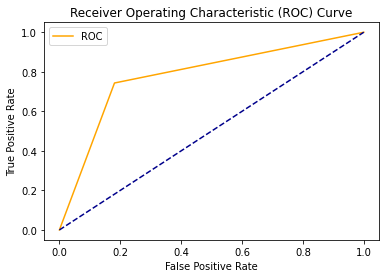

In [77]:
# or model2

plt.plot(fpr, tpr, color = 'orange',label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [78]:
#   how much area it is covering (AUC)
auc_score = roc_auc_score(y_test,y_predicted1)
print (auc_score)

0.7954311454311453


In [79]:
#   how much area it is covering (AUC)
auc_score = roc_auc_score(y_test,y_predicted2)
print (auc_score)

0.7811454311454311


# 79% chances to passenger survived